In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
# Load the teconer records and preddictions from the pickle file Teconer_10K_predictions.pkl and Teconer_10K_records.pkl
dataset = 'Teconer_100K'
records = pd.read_pickle(dataset+'_records.pkl')
predictions = pd.read_pickle(dataset+'_predictions.pkl')
val_horizon = pd.read_pickle(dataset+'_val_horizon.pkl')

print(len(records), len(predictions))
# # inlcude the predictions in the records as a new column
records['Predictions'] = predictions
records['Validity Horizon'] = val_horizon

print(records.head())



# iterate thru the records grouped by TripID
# and plot the records and the predictions

# remove the records in the same trip with the same AbsoluteTime
records = records.drop_duplicates(subset=['TripID', 'AbsoluteTime'], keep='first')


# change DateTime to datetime
records['DateTime'] = pd.to_datetime(records['DateTime'])


FileNotFoundError: [Errno 2] No such file or directory: 'Teconer_100K_predictions.pkl'

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


run_name = 'proud-dragon-3837'

# open the pickled log file from pickled_logs directory
logger = pd.read_pickle('pickled_logs/'+run_name+'.pkl')

X = np.array(logger.X)
df = pd.DataFrame()
# convert X to a dataframe with columns 'AbsoluteTime','Latitude', 'Longitude','Tsurf', 'Ta','Hours','Speed','Months'
df['AbsoluteTime'] = X[:,0].astype('float64')
df['Latitude'] = X[:,1].astype('float64')
df['Longitude'] = X[:,2].astype('float64')
df['Tsurf'] = X[:,3].astype('float64')
df['Ta'] = X[:,4].astype('float64')
df['Hours'] = X[:,5].astype('int64')
df['Speed'] = X[:,6].astype('float64')
df['Months'] = X[:,7].astype('int')
df['y'] = np.array(logger.y, dtype='float64')
df['y_pred'] = np.array(logger.y_pred, dtype='float64')
# df['abs_error'] = logger.error






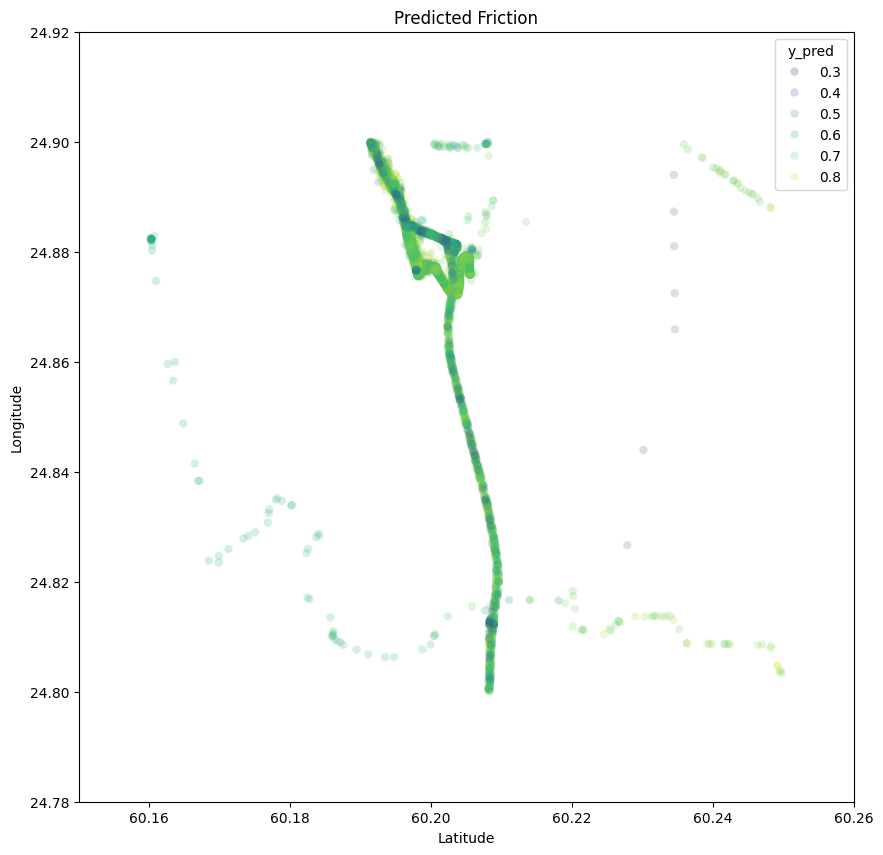

In [62]:
# include year in the datetime column by counting the number of times the month changes
# df['Year'] = 2020
# df['Month'] = 1
# month = 1

# for i in range(1, len(df)):
#     if df['Months'].iloc[i] != df['Months'].iloc[i-1]:
#         month += 1
#     df['Month'].iloc[i] = month



# df_ = df
df_ = df[df['Months'] == 3]


# plot y_pred vs lat/long in seaborn scatter plot
plt.figure(figsize=(10,10))
sns.scatterplot(x='Latitude', y='Longitude', hue='y_pred', data=df_, edgecolor='none', palette='viridis', alpha=0.2)
plt.xlim(60.15, 60.26)
plt.ylim(24.78, 24.92)
plt.title('Predicted Friction')
plt.show()


In [3]:
# find the the most frequent TripID and print the number of records for that TripID
# tripID = records['TripID'].value_counts().idxmax()
# print('The most frequent TripID is:', tripID)
# print('The number of records for this TripID is:', records['TripID'].value_counts().max())

# make a list of tripIDs sorted by the number of records
tripIDs = records['TripID'].value_counts().index.tolist()
print(len(tripIDs))
tripID = tripIDs[0]

# scatter Latitude and Longitude of the records with the hue of friction (subplot 1) and the predictions (subplot 2)
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
fric = sns.scatterplot(x='Longitude', y='Latitude', hue='Friction', data=records[records['TripID'] == tripID], ax=ax[0], alpha=0.9, palette='viridis', linewidth=0)
pred = sns.scatterplot(x='Longitude', y='Latitude', hue='Predictions', data=records[records['TripID'] == tripID], ax=ax[1], alpha=0.9, palette='viridis', linewidth=0)
# show a colorbar for the friction and the predictions


# lineplot of the records friction and the predictions for the most frequent TripID
fig2, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.lineplot(x='DateTime', y='Validity Horizon', data=records[records['TripID'] == tripID], ax=ax)

# ax.legend(['Measured', 'Predicted'])
# plt.show()




KeyError: 'TripID'

In [ ]:
k = 1
fig, ax = plt.subplots()
for trip_id, trip_records in records.groupby('TripID'):
    trip_records.scatter(x='Latitude', y='Longitude', ax=ax, label=trip_id)
    trip_records.scatter(x='timestamp', y='predictions', ax=ax, label=trip_id, linestyle='dashed')
    k += 1
    if k > 5:
        break